In [117]:
import pandas as pd

# Read the contents of the file into a list
with open('output/ether_time.txt', 'r') as file:
    contents = file.readlines()

# Convert the list to a DataFrame
df = pd.DataFrame(eval(contents[0]))

df[['Month/Year','Type']] = pd.DataFrame(df[0].tolist(), index= df.index)
# Print the resulting DataFrame
df = df.iloc[:, 1:]
df = df.rename(columns={1: 'Value'})
eth_val = df.pop('Value') # remove the 'Gender' column and store it in a variable
df.insert(2, 'Value', eth_val)


In [121]:
df_sorted=df.sort_values(by="Month/Year", key=lambda x: pd.to_datetime(x, format="%m/%Y"))
# df_sorted.head()

df_scam=df[df['Type'] == 'Scamming']
df_scam_sorted=df_scam.sort_values(by="Month/Year", key=lambda x: pd.to_datetime(x, format="%m/%Y"))

df_phishing=df[df['Type'] == 'Phishing']
df_phishing_sorted=df_phishing.sort_values(by="Month/Year", key=lambda x: pd.to_datetime(x, format="%m/%Y"))

df_fake_ico=df[df['Type'] == 'Fake ICO']
df_fake_ico_sorted=df_fake_ico.sort_values(by="Month/Year", key=lambda x: pd.to_datetime(x, format="%m/%Y"))

df_sorted.head(10)


,Month/Year,Type,Value
39,05/2017,Phishing,9.000000e+16
32,06/2017,Phishing,1.000000e+18
8,06/2017,Fake ICO,1.826740e+20
25,06/2017,Scamming,9.878410e+18
26,07/2017,Fake ICO,1.624220e+19
16,07/2017,Phishing,1.060149e+22
36,07/2017,Scamming,2.452982e+21
40,08/2017,Fake ICO,1.811647e+20
11,08/2017,Scamming,3.016474e+19
15,08/2017,Phishing,1.417513e+22


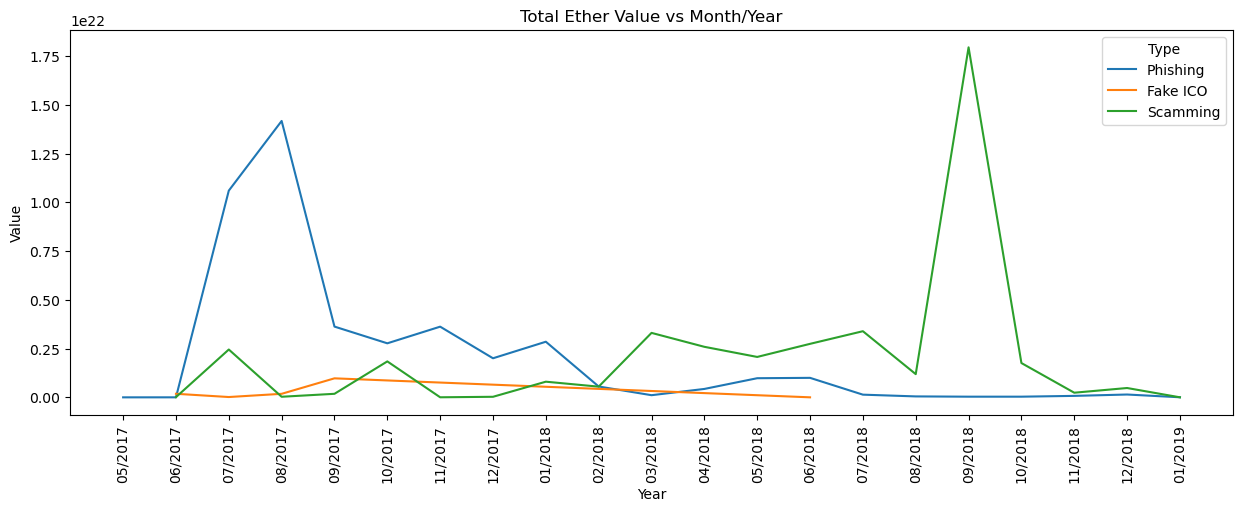

In [122]:
import seaborn as sns
plt.figure(figsize=(15, 5))
sns.lineplot(x='Month/Year', y='Value', hue='Type', data=df_sorted)

# add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Total Ether Value vs Month/Year')
plt.xticks(rotation=90)
plt.savefig('output/ether_time.png',  bbox_inches='tight')
plt.show()